In [18]:
import pandas as pd
%pylab inline
import statsmodels.formula.api as sm
import scipy, scipy.stats
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
yelpReviews = pd.read_csv('Yelp Data Restaurant Reviews Ratings.csv')

yelpReviews['high'] = yelpReviews['stars'].apply(lambda x: 1 if x > 3 else 0)

In [3]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(yelpReviews.ix[:,2:20],
                                                    yelpReviews['high'],
                                                    test_size=0.4, random_state=1)

In [11]:
est = sm.Logit(y_train, X_train).fit()

y_train_predict = est.predict(X_train)

y_test_mean = y_test_predict.mean()

predicted_choice_train = (y_train_predict > y_test_mean).astype(int)

def confusion_matrix(y, y_predict):
    cm = sk_confusion_matrix(y, y_predict)
    cm = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm.columns.name = 'Predicted label'
    cm.index.name = 'True label'
    accuracy = 1-(y_predict != y).mean()
    print('accuracy: %.2f' % accuracy)
    return cm

confusion_matrix(y_train, predicted_choice_train)

Optimization terminated successfully.
         Current function value: 0.627196
         Iterations 5
accuracy: 0.50


Predicted label,0,1
True label,,
0,2230,1665
1,4298,3806


In [8]:
y_test_predict = est.predict(X_test)

predicted_choice_test = (y_test_predict > 0.5).astype(int)

confusion_matrix(y_test, predicted_choice_test)

accuracy: 0.68


Predicted label,0,1
True label,,
0,2,2549
1,4,5445


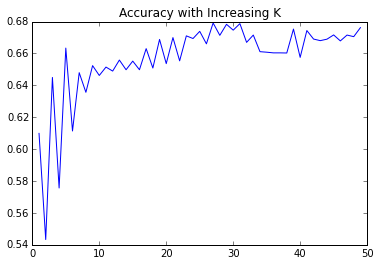

27


In [7]:
results = []
for n in range(1, 50, 1):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_train)
    accuracy = np.where(preds==y_train, 1, 0).sum() / float(len(X_train))

    results.append([n, accuracy])

results = pd.DataFrame(results, columns=["n", "accuracy"])

plot(results.n, results.accuracy)
title("Accuracy with Increasing K")
show()

print (results['accuracy'].argmax()+1)

In [16]:
clf = KNeighborsClassifier(n_neighbors=27)
clf.fit(X_train, y_train)

train_preds = clf.predict(X_train)

confusion_matrix(y_train, train_preds)

accuracy: 0.68


Predicted label,0,1
True label,,
0,240,3655
1,195,7909


In [17]:
test_preds = clf.predict(X_test)

confusion_matrix(y_test, test_preds)

accuracy: 0.68


Predicted label,0,1
True label,,
0,150,2401
1,143,5306


In [13]:
classifier = MultinomialNB()
NB_train = classifier.fit(X_train,y_train)

nb_train_predict = NB_train.predict(X_train)

confusion_matrix(y_train,nb_train_predict)

accuracy: 0.67


Predicted label,0,1
True label,,
0,41,3854
1,90,8014


In [14]:
nb_test_predict = NB_train.predict(X_test)

confusion_matrix(y_test,nb_test_predict)

accuracy: 0.68


Predicted label,0,1
True label,,
0,32,2519
1,64,5385


In [19]:
rf_train = RandomForestClassifier(n_jobs=20).fit(X_train,y_train)

In [24]:
rf_train_preds = rf_train.predict(X_train)

confusion_matrix(y_train,rf_preds)

accuracy: 0.71


Predicted label,0,1
True label,,
0,632,3263
1,275,7829


In [25]:
rf_test_preds = rf_train.predict(X_test)

confusion_matrix(y_test,rf_test_preds)

accuracy: 0.67


Predicted label,0,1
True label,,
0,251,2300
1,315,5134
